# Лабораторная работа №2
## СТАТИСТИЧЕСКИЙ И СПЕКТРАЛЬНЫЙ АНАЛИЗ ВРЕМЕННЫХ РЯДОВ
### Комлева Юлия Владимировна
### Вариант: 9
### Группа: РИМ-181226

#### 1. Сначала импортируйте в свой код нужные библиотеки, функции и т.д.

In [190]:
import numpy as np
import numpy.random as rand
import matplotlib.pyplot as plt
from scipy import signal 
import scipy.stats as stats
from statsmodels.tsa import api as tsa
from pandas.tools.plotting import autocorrelation_plot 
from statsmodels.graphics.tsaplots import plot_acf 
%matplotlib inline

In [191]:
import math

#### 2. В зависимости от своего варианта, который определяется по последним двум цифрам студ. билета, из таблицы 1 на следующих страницах создать временной ряд из столбца (всего 24 точки).

In [192]:
X = [12.19, 8.41, 14.68, 8.64, 32.94, 22.61, 45.92, 23.63, 18.59, 36.22, 50.10, 46.22, 23.63, 47.30, 40.03, 56.53, 38.41, 51.47, 6.29, 35.41, 67.79, 74.21, 79.12, 45.10]
len(X)

24

In [193]:
X = np.array(X)

In [194]:
t = np.linspace(0, 1, num = 24)

#### 3. Построить график заданного ряда на временном интервале от 0 до 1.

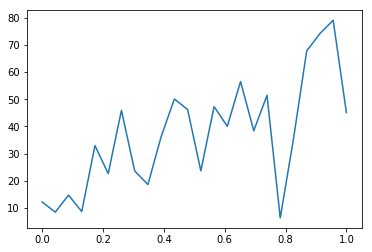

In [195]:
plt.plot(t, X)
plt.show()

**Вижу возрастающий тренд**

#### 4. Рассчитать мат. ожидание и дисперсию для ВР.

In [196]:
np.mean(X)

36.89333333333333

In [197]:
np.var(X)

409.07998055555555

#### 5. Построить автокорреляционную функцию ряда и сделать на ее основе выводы о характере временного ряда.

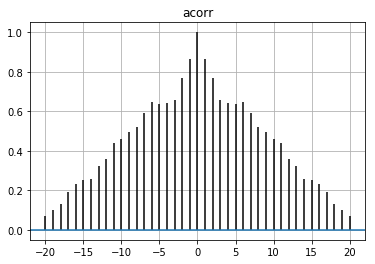

In [215]:
plt.acorr(X, usevlines=True, normed=True, maxlags = 20)
plt.grid(True)
plt.title("acorr")
plt.show()

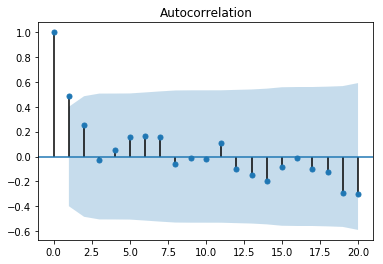

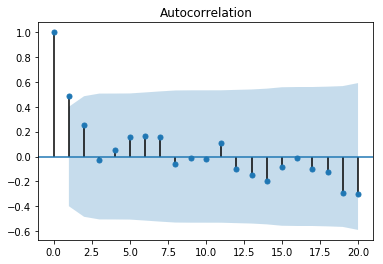

In [218]:
plot_acf(X, lags = 20)

- Присутствует тренд (лаг 1)
- АКФ затухает

#### 6. Используя функцию pds, pdden = signal.periodogram(X) построить периодограмму ряда и сделать на ее основе выводы о характере временного ряда. Сравнить их с результатами, сделанными на основе анализа автокорреляционной функции.
#### 7. Построить оценку спектральной плотности мощности ряда с помощью метода Велша (Welch), используя функцию pdw, pddenw = signal.welch(X, nperseg = ...) Сравнить полученные результаты с периодограммой.

In [199]:
pds, pdden = signal.periodogram(X)
pdw, pddenw = signal.welch(X, nperseg=24)

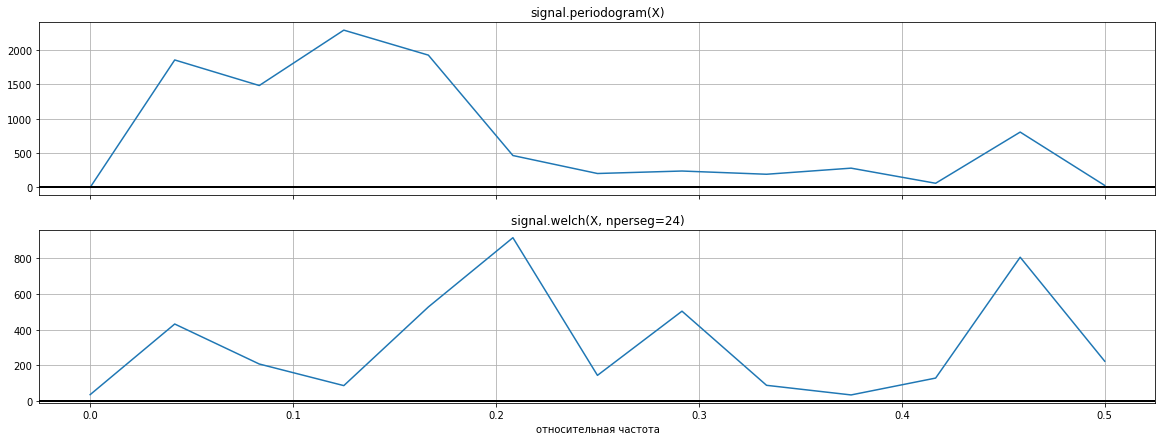

In [200]:
fig, [ax1, ax2] = plt.subplots(2, 1, sharex=True, figsize=(20,7))
ax1.plot(pds, pdden)
ax1.grid(True)
ax1.axhline(0, color='black', lw=2)
ax1.set_title("signal.periodogram(X)")


ax2.plot(pdw, pddenw)
ax2.grid(True)
ax2.axhline(0, color='black', lw=2)
ax2.set_title("signal.welch(X, nperseg=24)")
ax2.set_xlabel("относительная частота")

plt.show()

- Периодограмма позволяет оценить спектральную плотность мощности выборочного сигнала. Периодограмма - преобразование Фурье выборочной оценки АКФ. Периодограмма - та же самая оценка АКФ, но представлена не в виде зависимости от задержки/лага, а в виде её частотного представления. Удобно для поиска периодичности гармоник. 
- Метод Уэлша также для оценки спректральной мощности выборки ВР.
- Не вижу явной периодической составляющей

#### 9. Проверить с помощью метода Ирвина ряд на аномальные наблюдения. Для этого написать собственную функцию, реализующую данный статистический тест, которая получает исходный ВР и возвращает номера отсчетов, которые являются аномальными. Для создания метода использовать выражения из лекции 3 на страницах 13 и 14. Для N=24 принять значение критического критерия равным 1.23 (alpha = 0.05 ) и 1.74 (alpha = 0.01).

In [201]:
N = 24
c1 = 1.23
alpha1 = 0.05
c2 = 1.74
alpha2 = 0.01

In [202]:
σ = np.sqrt(np.var(X))

In [219]:
Xrolled = np.roll(X, 1)

In [234]:
t1 = []
t2 = []
def irw():
    k = (np.abs(X-Xrolled)/σ)
    for i in range(24):
        if k[i] > cr1:
            print("\С вероятностью ", alpha1, " гипотеза Н0 отвергнута. Принимается гипотеза Н1. Отсчет ", i, " аномальный. k = ", k[i])
            t1.append(i)
        if k[i] > cr2:
            print("/С вероятностью ", alpha2, " гипотеза Н0 отвергнута. Принимается гипотеза Н1. Отсчет ", i, " аномальный. k = ", k[i])
            t2.append(i)

#### 10. Указать найденные номера аномальных наблюдений. Построить график ВР и указать эти точки на изображении. Изображение добавить в отчет.

In [235]:
irw()

\С вероятностью  0.05  гипотеза Н0 отвергнута. Принимается гипотеза Н1. Отсчет  0  аномальный. k =  1.6271356820259504
\С вероятностью  0.05  гипотеза Н0 отвергнута. Принимается гипотеза Н1. Отсчет  18  аномальный. k =  2.2337888214503927
/С вероятностью  0.01  гипотеза Н0 отвергнута. Принимается гипотеза Н1. Отсчет  18  аномальный. k =  2.2337888214503927
\С вероятностью  0.05  гипотеза Н0 отвергнута. Принимается гипотеза Н1. Отсчет  19  аномальный. k =  1.4397505639804213
\С вероятностью  0.05  гипотеза Н0 отвергнута. Принимается гипотеза Н1. Отсчет  20  аномальный. k =  1.6009314306897686
\С вероятностью  0.05  гипотеза Н0 отвергнута. Принимается гипотеза Н1. Отсчет  23  аномальный. k =  1.6820162838809734


In [236]:
t1

[0, 18, 19, 20, 23]

In [237]:
t1 = t1[1:5]
t1

[18, 19, 20, 23]

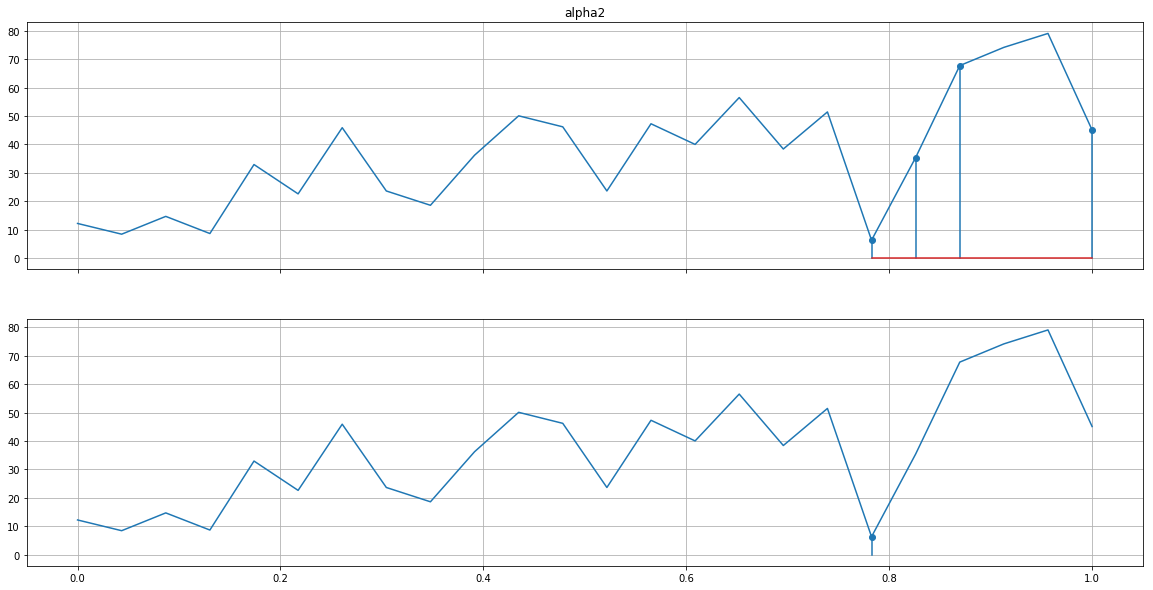

In [238]:
fig, [ax1, ax2] = plt.subplots(2, 1, sharex=True, figsize=(20,10))

ax1.set_title("alpha1")
ax1.grid(True)
ax1.plot(t, X)
ax1.stem(t[t1], X[t1])

ax1.set_title("alpha2")
ax2.grid(True)
ax2.plot(t, X)
ax2.stem(t[t2], X[t2])

plt.show()

#### 11. Доказать, что во ВР есть неслучайная составляющая с помощью критерия серий (лекция 3, стр. 17). Построить функцию, которая бы производила расчет этого критерия для заданного ряда, с выводом результатов в виде конкретных предложений вида «гипотеза о неизменности среднего значения ВР отвергается с вероятностью ошибки альфа» или «принятие альтернативной гипотезы о неслучайной составляющей ряда» и т.п. Для этого используйте функцию print('Строка для вывода'), чтобы выводить в командное окно строки.

In [208]:
med = np.median(X)
med

37.315

In [209]:
#выборочная медиана
Xvar = np.sort(X)
(Xvar[N1-1] + Xvar[N1])/2

37.315

In [210]:
def randpart(X):
    med = np.median(X)
    str1 = ""
    for i in X:
        if i > med:
            str1+="+"
        else:
            str1+="-"
    print (str1)
    qcnt = 0
    tau = 0
    cnt1 = 1
    v = 1
    for i in range(23):
        if str1[i] == str1[i+1]:
            cnt1 += 1
        else:
            cnt1 = 0
            v +=1
        if cnt1 > tau:
            tau = cnt1

    print("Количество серий ", v)
    print("Максимальная длина серии ", tau)
    if (v > 0.5*(N + 2 -1.96*np.sqrt(N-1)) and tau < 1.43* math.log(N+1)):
        print("Оба неравенства выполняются. Гипотеза H0:M[x] = const о неизменности среднего значени ВР ПРИНИМАЕТСЯ с вероятностью ошибки ", alpha)
    else: 
        print("Одно из неравенств не выполняется. Гипотеза H0:M[x] = const о неизменности среднего значени ВР ОТВЕРГАЕТСЯ с вероятностью ошибки ", alpha)
randpart(X)

------+---++-+++++--++++
Количество серий  8
Максимальная длина серии  6
Одно из неравенств не выполняется. Гипотеза H0:M[x] = const о неизменности среднего значени ВР ОТВЕРГАЕТСЯ с вероятностью ошибки  0.05


#### 12. Наконец, произвести оценку ВР на стационарность.
#### 13. Сначала используйте известный KPSS-тест. Для этого есть функция tsa.kpss(X), которая возвращает статистику теста kpss_stat, p- значение теста p_value, и другие полезные результаты (критические значения на разных % и т.д.).


In [112]:
tsa.kpss(X)

(0.421871287191115,
 0.06772789345210561,
 9,
 {'10%': 0.347, '5%': 0.463, '2.5%': 0.574, '1%': 0.739})

#### 14. Если KPSS-test в статистике близок к 0, то временной ряд является стационарным по КПСС-тесту, то есть нулевая гипотеза о тренд-стационарности ряда принята.
#### 15. Если KPSS-test в статистике вернул значение существенно больше нуля, то временной ряд не является стационарным по КПСС-тесту, то есть нулевая гипотеза о тренд-стационарности ряда отвергнута и принята альтернативная.

0.421871287191115 - не близко у нулю, ВР не является стационарным по КПСС-тесту, то есть нулевая гипотеза о тренд-стационарности **отвергнута** и принята альтернативная.

#### 16. Другой показатель, на который следует обратить внимание – это p-value. Если он существенно меньше 0.1 (например, 0.01) то нулевая гипотеза отклоняется. Если он близок или равен 0.1, то нулевая гипотеза принимается.

p-value = 0.06772789345210561. Нулевая гипотеза **отвергается**.

#### 17. Проверить с помощью критерия Фишера две половинки исходного временного ряда на соответствие дисперсий.
#### 18. Критерий Фишера можно реализовать через функцию stats.f_oneway(x, y)

In [211]:
N1 = 12
N2 = 24
X1 = X[0:N1]
X2 = X[N1:N2]

In [212]:
stats.f_oneway(X1, X2)

F_onewayResult(statistic=7.531539103275881, pvalue=0.011836047979940695)

- нулевая гипотеза отклоняется

#### 19. Проверить с помощью критерия Стьюдента две половинки исходного временного ряда на соответствие мат. ожиданий (при предположении о равных дисперсиях).


#### 20. Для критерия Стьюдента надо написать собственную функцию, используя выражение (3.5) из лекции 3, значение критического параметра t(1-a, n1+n2-1) можно найти через функцию
stats.t.ppf(1-a, N1+N2-1)

In [217]:
alpha = alpha1
M1 = np.mean(X1)
M2 = np.mean(X2)
D1 = np.var(X1)
D2 = np.var(X2)
Ks = ((M1-M2)/np.sqrt((N1-1)*D1 + (N2-1)*D2))* np.sqrt((N1*N2*(N1+N2-2))/(N1+N2))
Kst = stats.t.ppf(1-alpha, N1+N2-2)
print("Ks ", Ks)
print("Kst ", Kst)
if Ks < Kst:
    print("Гипотеза о постоянстве мат. ожидания отклоняется с уровнем значимости ", alpha)
else: 
    print("Гипотеза о постоянстве мат. ожидания принимается с уровнем значимости ", alpha)
    

Ks  -3.1440052120909194
Kst  1.6909242507706543
Гипотеза о постоянстве мат. ожидания отклоняется с уровнем значимости  0.05


Проверка на стационарность на основе критерия Фишера и Критерия Стьюдента. Статистический тест состоит из двух частей. Сначала используется критерий Фишера для проверки гипотезы о постоянстве дисперсий. **ОТКЛОНЯЕТСЯ**
Если гипотеза принята (а она не принята), то проверяется критерием Стьюдента. 

#### 21. Сравнить полученный критерий Стьюдента с результатами работы функции scipy.stats.ttest_ind(x, y)

In [214]:
stats.ttest_ind(X[0:12],X[12:24])

Ttest_indResult(statistic=-2.744364972680545, pvalue=0.011836047979940676)

#### 22. Пояснить все полученные результаты.

- Сначала применили критерий Фишера. Нулевая гипотеза **отклоняется**.
- По критерию Стьюдента нулеввая гипотеза **отклоняется**.
- По критерию Серий гипотеза о неизменности среднего значения ВР **отвергается**. 
- **Не стационарен** по КПСС тесту


- В анализируемом ВР есть зависящая от времени **НЕСЛУЧАЙНАЯ** составляющая.
- От 1 до 5 аномальных отсчетов при разных alpha